In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abc-xyz-inventory-classification-dataset/abc_xyz_dataset.csv


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Data Loading and Initial Inspection**

In [2]:
# Load data 
df = pd.read_csv('/kaggle/input/abc-xyz-inventory-classification-dataset/abc_xyz_dataset.csv')
df.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [3]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

In [4]:
# Check null values
df.isnull().sum()

Item_ID               0
Item_Name             0
Category              0
Jan_Demand            0
Feb_Demand            0
Mar_Demand            0
Apr_Demand            0
May_Demand            0
Jun_Demand            0
Jul_Demand            0
Aug_Demand            0
Sep_Demand            0
Oct_Demand            0
Nov_Demand            0
Dec_Demand            0
Total_Annual_Units    0
Price_Per_Unit        0
Total_Sales_Value     0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# View summary statistics of numerical values
df.describe()

,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,1418.515000,1418.394000,1421.23900,1409.242000,1411.762000,1412.853000,1410.558000,1403.721000,1411.109,1411.700000,1413.422000,1419.38100,16961.896000,57.358000,1.072288e+06
std,1489.352997,1488.076126,1496.49987,1489.280958,1488.620593,1490.568779,1497.772702,1484.283184,1482.689,1484.762652,1482.821287,1496.14098,17788.477345,155.110913,4.087477e+06
min,24.000000,7.000000,2.00000,8.000000,9.000000,15.000000,6.000000,2.000000,2.000,11.000000,9.000000,4.00000,581.000000,2.000000,1.228000e+03
25%,282.750000,279.000000,278.00000,278.000000,280.000000,277.750000,267.000000,283.000000,282.000,277.000000,275.750000,283.00000,3369.500000,2.000000,1.661900e+04
50%,539.500000,558.000000,591.50000,558.000000,541.500000,598.000000,555.000000,550.500000,547.000,591.000000,608.000000,562.00000,6737.500000,10.000000,7.283600e+04
75%,2478.500000,2529.250000,2515.75000,2427.000000,2461.250000,2451.500000,2547.500000,2407.750000,2472.750,2492.500000,2406.250000,2422.00000,29874.500000,50.000000,3.782425e+05
max,5276.000000,5171.000000,5271.00000,5186.000000,5384.000000,5462.000000,5504.000000,5219.000000,5240.000,5189.000000,5255.000000,5180.00000,59967.000000,1000.000000,5.946200e+07


In [10]:
# Set visualization style
plt.style.use('seaborn')
sns.set_palette('viridis')

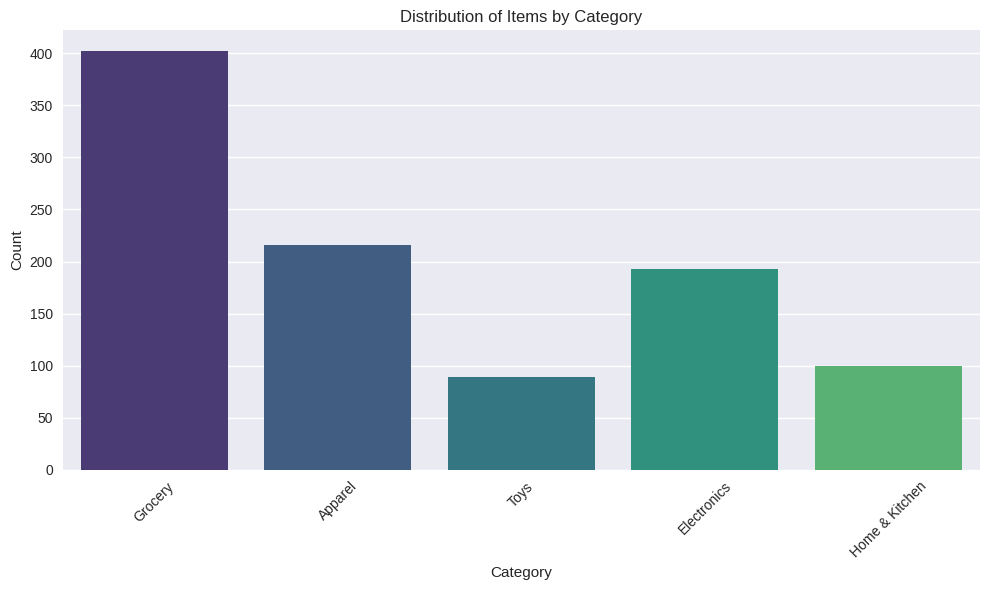

In [11]:
# Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Items by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:")
print(df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_U

#### **Analysis Results**

- **Summary Statistics:**
    - Monthly demand columns (e.g., Jan_Demand to Dec_Demand) show consistent means (1,400 units) and standard deviations (1,490 units), indicating stable demand with significant variability across items.
    - Total_Annual_Units ranges from 581 to 59,967 units (mean: 16,961), suggesting a wide disparity in item popularity.
    - Price_Per_Unit varies from 2 to 1,000 (mean: 57.36), highlighting diverse pricing strategies across items.
    - Total_Sales_Value spans 1,228 to 59,462,000 (mean: 1,072,288), with a high standard deviation (4,087,477), reflecting the combined effect of demand and price variability.
- **Category Distribution:**
    - The count plot reveals a significant imbalance: Grocery dominates with 400 items, followed by Apparel, Electronics, Toys, and Home & Kitchen.
    - This imbalance suggests Grocery items may disproportionately influence aggregate trends, necessitating category-wise analysis to avoid bias in machine learning models.
- **Initial Observations:**
    - The first 5 rows show Grocery items (e.g., "Surface Near") generally have higher demand (4,000–5,000 units/month) and total sales compared to Apparel (e.g., "Win Everyone" with 15–387 units/month), likely due to pricing differences ($10 vs. $2).
- The dataset's variability in demand, price, and sales indicates potential for feature engineering, such as deriving seasonal trends or price-demand relationships, to enhance predictive modeling.

## **Data Preprocessing**

In [13]:
# Validate Total_Annual_Units by summing monthly demands
df['Calculated_Annual_Units'] = df[['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 
                                    'May_Demand', 'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 
                                    'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']].sum(axis=1)
print("Discrepancies in Total_Annual_Units:")
print((df['Total_Annual_Units'] != df['Calculated_Annual_Units']).sum())

Discrepancies in Total_Annual_Units:
0


In [14]:
# Validate Total_Sales_Value
df['Calculated_Sales_Value'] = df['Total_Annual_Units'] * df['Price_Per_Unit']
print("\nDiscrepancies in Total_Sales_Value:")
print((df['Total_Sales_Value'] != df['Calculated_Sales_Value']).sum())


Discrepancies in Total_Sales_Value:
0


In [15]:
# Derive new features
# Monthly average demand
df['Avg_Monthly_Demand'] = df[['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 
                               'May_Demand', 'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 
                               'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']].mean(axis=1)

In [16]:
# Seasonality: Demand variation (std dev across months)
df['Demand_Variation'] = df[['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 
                             'May_Demand', 'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 
                             'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']].std(axis=1)

In [17]:
# Display updated dataframe info and sample
print("\nUpdated DataFrame Info:")
print(df.info())
print("\nFirst 5 Rows with New Features:")
print(df.head())


Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Item_ID                  1000 non-null   object 
 1   Item_Name                1000 non-null   object 
 2   Category                 1000 non-null   object 
 3   Jan_Demand               1000 non-null   int64  
 4   Feb_Demand               1000 non-null   int64  
 5   Mar_Demand               1000 non-null   int64  
 6   Apr_Demand               1000 non-null   int64  
 7   May_Demand               1000 non-null   int64  
 8   Jun_Demand               1000 non-null   int64  
 9   Jul_Demand               1000 non-null   int64  
 10  Aug_Demand               1000 non-null   int64  
 11  Sep_Demand               1000 non-null   int64  
 12  Oct_Demand               1000 non-null   int64  
 13  Nov_Demand               1000 non-null   int64  
 14  

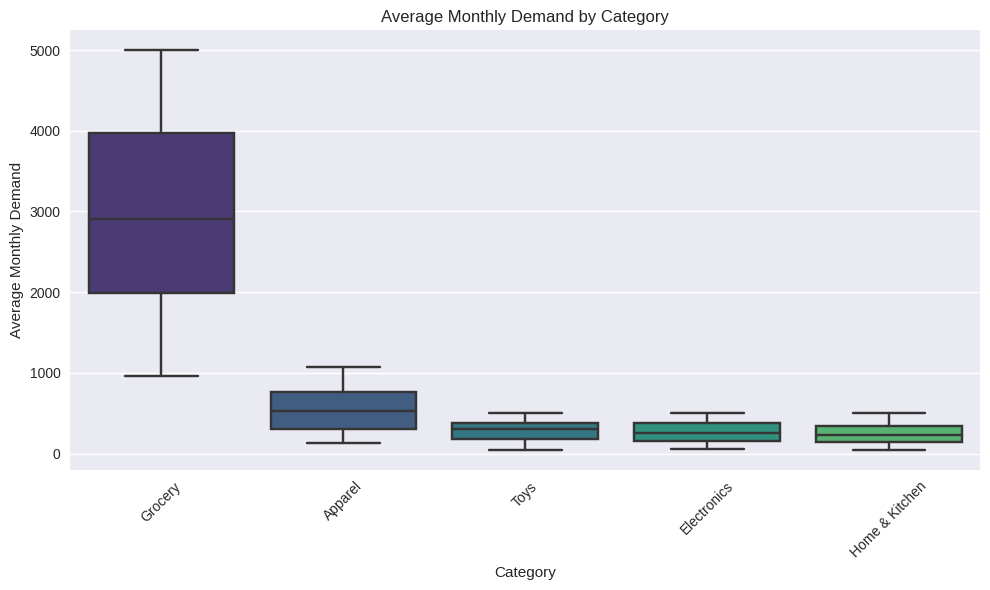

In [18]:
# Visualizations
# Distribution of Avg_Monthly_Demand by Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Avg_Monthly_Demand')
plt.title('Average Monthly Demand by Category')
plt.xlabel('Category')
plt.ylabel('Average Monthly Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

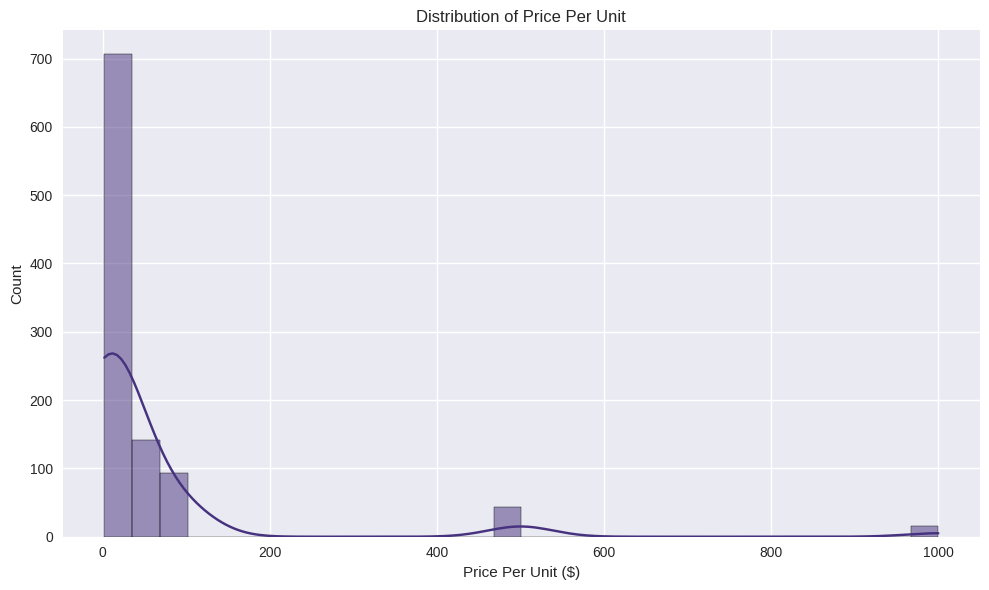

In [19]:
# Distribution of Price_Per_Unit
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price_Per_Unit', bins=30, kde=True)
plt.title('Distribution of Price Per Unit')
plt.xlabel('Price Per Unit ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

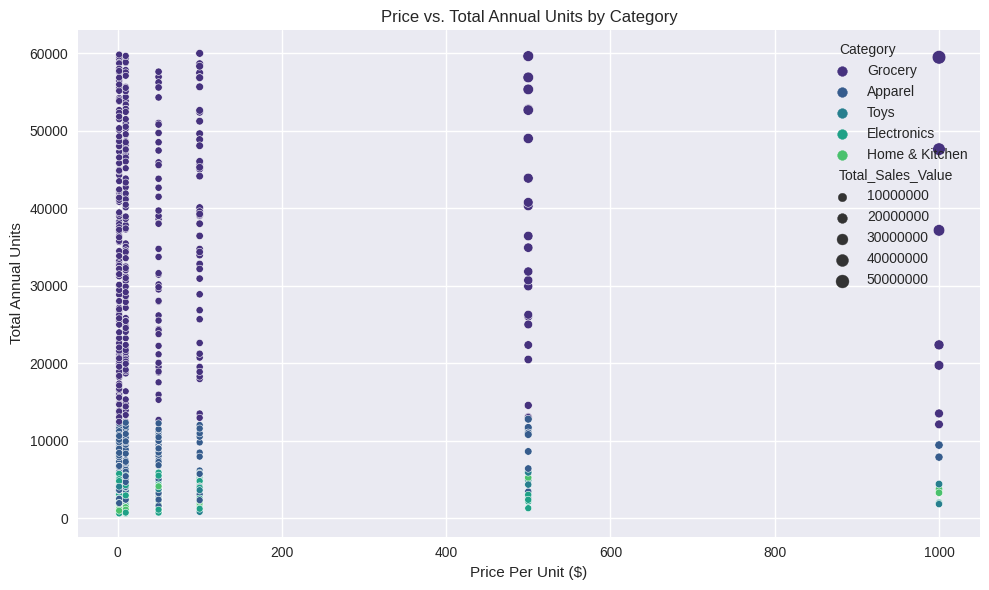

In [20]:
# Scatter plot: Price vs. Total_Annual_Units
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price_Per_Unit', y='Total_Annual_Units', hue='Category', size='Total_Sales_Value')
plt.title('Price vs. Total Annual Units by Category')
plt.xlabel('Price Per Unit ($)')
plt.ylabel('Total Annual Units')
plt.tight_layout()
plt.show()

#### **Analysis of Results**

- **Average Monthly Demand by Category (Boxplot):**
    - Grocery items exhibit the highest median Avg_Monthly_Demand with a wide interquartile range (IQR) and outliers extending to 5,000 units, suggesting significant variability within the category.
    - Apparel, Toys, Electronics, and Home & Kitchen have much lower median demands, with tighter IQRs and fewer outliers, indicating more consistent but lower demand.
    - The stark contrast between Grocery and other categories underscores the need for stratified analysis or sampling to balance category representation in machine learning models.
- **Distribution of Price Per Unit (Histogram):**
    - The distribution is heavily right-skewed, with a sharp peak at 2–10 (over 600 items) and a long tail extending to 1,000.
    - Smaller peaks at 500 and 1,000 suggest a few high-priced items, likely in categories like Electronics or Toys, contrasting with the majority of low-priced items (e.g., Grocery/Apparel).
    - This skewness indicates that price may need logarithmic transformation for modeling to reduce the impact of extreme values.
- **Price vs. Total Annual Units by Category (Scatter Plot):**
    - Most items cluster at low prices ($2–$100) with varying Total_Annual_Units (up to 60,000), predominantly Grocery (purple) and Apparel (blue), with Grocery items generally having higher units sold.
    - High-priced items ($500–$1,000) show lower Total_Annual_Units (mostly below 20,000), with larger points (higher Total_Sales_Value) indicating that high prices compensate for lower demand in terms of revenue.
    - Categories like Electronics (green) and Home & Kitchen (light green) are more scattered across price ranges, suggesting diverse pricing strategies within these groups.
    - The plot highlights a potential inverse relationship between price and demand, which could be explored further for price elasticity modeling.

In [21]:
# Recreate features from Step 2
df['Avg_Monthly_Demand'] = df[['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 
                               'May_Demand', 'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 
                               'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']].mean(axis=1)
df['Demand_Variation'] = df[['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 
                             'May_Demand', 'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 
                             'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']].std(axis=1)

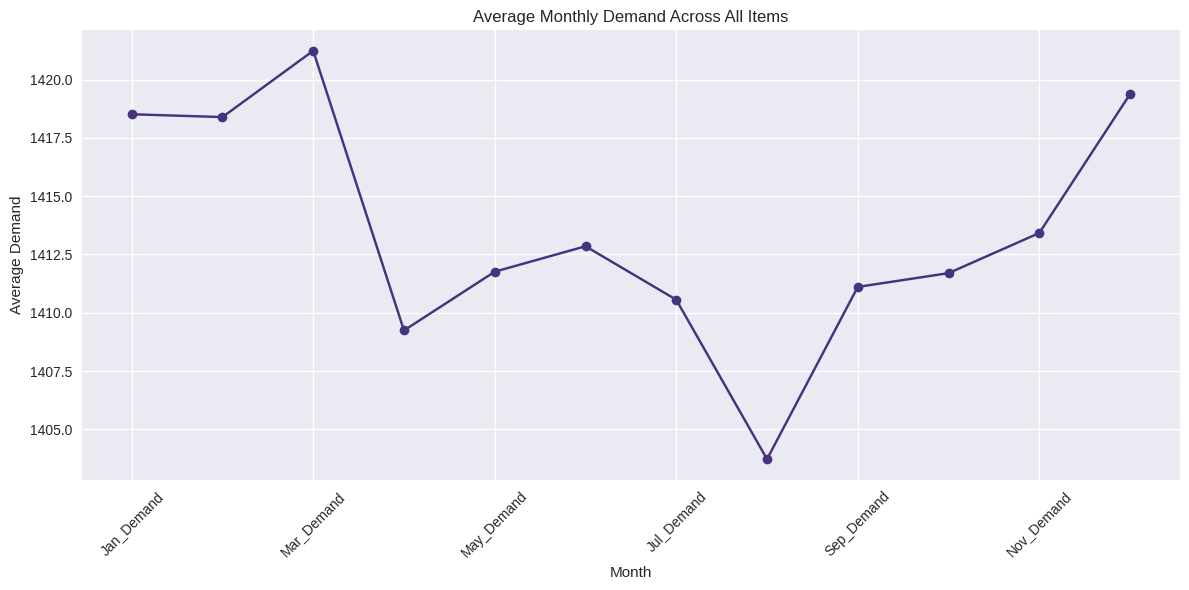

In [22]:
# Step 3: Exploratory Data Analysis

# 1. Monthly Demand Trends by Category
monthly_demand = df[['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 
                     'May_Demand', 'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 
                     'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']].mean()
plt.figure(figsize=(12, 6))
monthly_demand.plot(kind='line', marker='o')
plt.title('Average Monthly Demand Across All Items')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

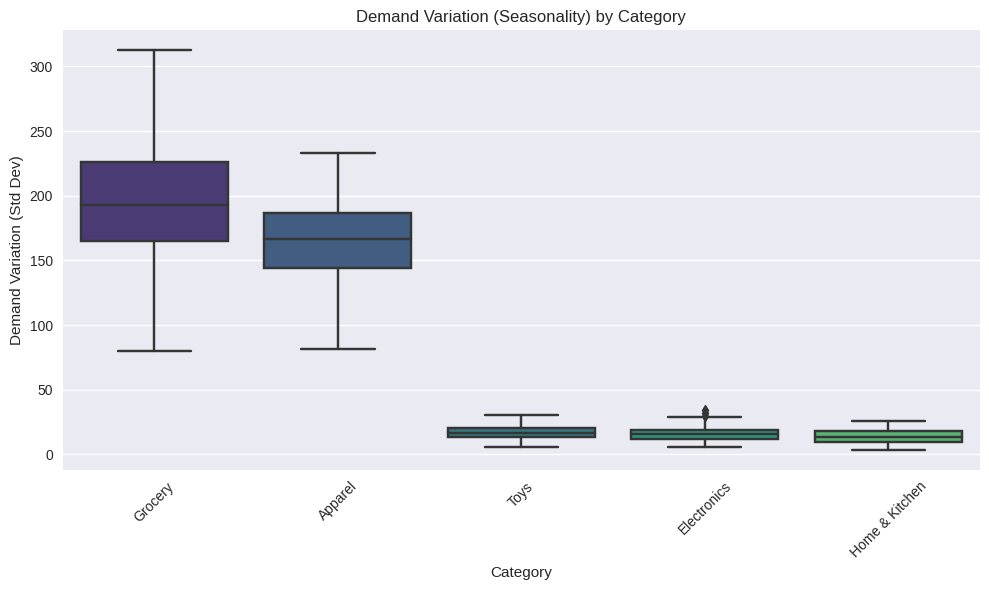

In [23]:
# 2. Demand Variation by Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Demand_Variation')
plt.title('Demand Variation (Seasonality) by Category')
plt.xlabel('Category')
plt.ylabel('Demand Variation (Std Dev)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

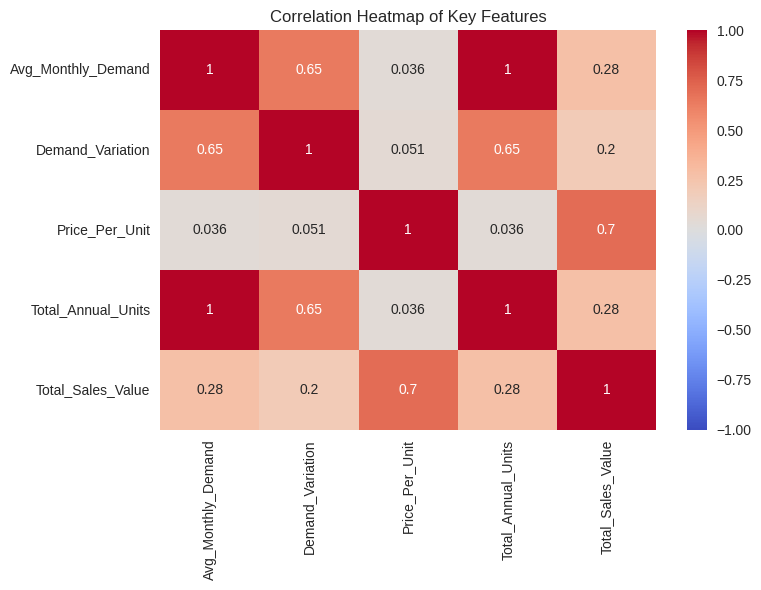

In [24]:
# 3. Correlation Heatmap
# Select numerical columns for correlation
corr_cols = ['Avg_Monthly_Demand', 'Demand_Variation', 'Price_Per_Unit', 'Total_Annual_Units', 'Total_Sales_Value']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

In [25]:
# 4. Top 10 Items by Total Sales Value
top_10_sales = df.nlargest(10, 'Total_Sales_Value')[['Item_Name', 'Category', 'Total_Sales_Value']]
print("\nTop 10 Items by Total Sales Value:")
print(top_10_sales)


Top 10 Items by Total Sales Value:
            Item_Name Category  Total_Sales_Value
924           Ten And  Grocery           59462000
511        Radio Race  Grocery           47606000
521      Pattern Book  Grocery           37136000
394        Animal Key  Grocery           29804500
168     Material Vote  Grocery           28431000
516    Health Hundred  Grocery           27658500
587    Station Recent  Grocery           26364000
851      Material Leg  Grocery           26322000
849  Opportunity Rock  Grocery           24492500
352     With Behavior  Grocery           22361000


#### **Analysis Results**
- **Average Monthly Demand Across All Items (Line Plot):**
    - Demand fluctuates between 1,400 and 1,420 units, with a noticeable dip in August and a peak in December.
    - The overall trend shows slight seasonality: a decline from January to April, a trough in mid-year (June–August), and a recovery towards year-end (October–December).
    - This pattern suggests potential holiday-driven demand spikes (e.g., November–December), which could be a key feature for time-series forecasting models.
- **Demand Variation (Seasonality) by Category (Boxplot):**
    - Grocery items exhibit the highest demand variation (median about 150, with outliers up to around 300), indicating significant monthly fluctuations, likely due to their high sales volume.
    - Apparel follows with a median variation of 100, while Toys, Electronics, and Home & Kitchen show lower variability (median 50), suggesting more stable demand patterns.
    - The higher variation in Grocery and Apparel highlights the need for category-specific seasonality features in predictive models to capture these fluctuations.
- **Correlation Heatmap of Key Features:**
    - Avg_Monthly_Demand and Total_Annual_Units are perfectly correlated (1.0), as expected, since the former is derived from monthly demands summed to the latter.
    - Demand_Variation shows a moderate correlation (0.65) with both Avg_Monthly_Demand and Total_Annual_Units, indicating that items with higher demand tend to have greater monthly fluctuations.
    - Price_Per_Unit has a weak correlation with demand metrics (0.036 with Avg_Monthly_Demand and Total_Annual_Units) but a strong correlation with Total_Sales_Value (0.7), reflecting that higher prices significantly drive revenue.
    - Total_Sales_Value has a low correlation with demand metrics (0.28), suggesting that revenue is more influenced by price than volume in this dataset.
- **Top 10 Items by Total Sales Value:**
    - All top 10 items are from the Grocery category, with sales values ranging from 22,361,000 ("With Behavior") to $59,462,000 ("Ten And").
    - This dominance aligns with Grocery’s higher demand and item count, but the high sales values are likely driven by a combination of moderate demand and higher Price_Per_Unit (e.g., items with prices around 100–1,000, as seen in earlier scatter plots).
    - For machine learning, these high-revenue items could be prioritized for inventory optimization or targeted forecasting to maximize business impact.

## **Summary of Findings**

- **Category Imbalance and Demand Patterns:**
    - Grocery dominates in item count, demand, and revenue, with higher monthly demand and variation, indicating strong seasonality (e.g., year-end spikes).
    - Other categories (Apparel, Toys, Electronics, Home & Kitchen) have lower demand and more stable patterns, suggesting different consumption behaviors.
- **Price and Sales Dynamics:**
    - Price_Per_Unit is heavily skewed, and while it weakly correlates with demand, it strongly drives Total_Sales_Value (correlation: 0.7).
    - High-priced items have lower demand but significant revenue, indicating price elasticity varies across categories.
- **Seasonality and Trends:**
    - Aggregate demand shows a mid-year dip (June–August) and a year-end peak (November–December), likely due to holiday shopping trends.
    - Grocery and Apparel exhibit the most significant demand variation, necessitating seasonal features for accurate forecasting.
- **Feature Engineering Opportunities:**
    - Derived features like Avg_Monthly_Demand and Demand_Variation capture key patterns and correlate with sales metrics, making them valuable for modeling.
    - The dataset’s consistency (no discrepancies in totals) ensures reliability for predictive tasks.

#### **Machine Learning Implications**

1. **Problem Framing:** 
    - Use monthly demand data to predict future sales, incorporating seasonality and category-specific trends.
    - Predict Total_Sales_Value using Price_Per_Unit and demand features to optimize pricing strategies.
    - Segment items by demand patterns and price sensitivity for targeted inventory management.
2. **Feature Engineering:**
    - Create seasonal indicators (e.g., binary flags for high-demand months like November–December).
    - Apply logarithmic transformation to Price_Per_Unit and Total_Sales_Value to handle skewness.
    - Encode Category as a categorical feature and consider stratified sampling to address imbalance.
3. **Modeling Recommendations:**
    - **Time-Series Models:** Use ARIMA, Prophet, or LSTM for demand forecasting, incorporating monthly trends and Demand_Variation.
    - **Regression Models:** Apply Random Forest or Gradient Boosting (e.g., XGBoost) to predict Total_Sales_Value, using Price_Per_Unit, Avg_Monthly_Demand, and Category as features.
    - **Clustering:** Use K-Means or DBSCAN to group items by demand and price patterns for inventory segmentation.
4. **Evaluation Metrics:**
    - For forecasting: Use RMSE or MAE to measure demand prediction accuracy.
    - For regression: Use R² and RMSE to evaluate Total_Sales_Value predictions.
    - For clustering: Use silhouette score to assess the quality of item segments.